## Import Required Libraries

---


In [1]:
# Libraries for preprocessing and EDA:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Libraries for ML:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import xgboost as xgb

In [2]:
def uniqounter(y_list):
    preds = {}
    for i in pd.Series(y_list).unique():
        preds[i] = 0
    for i in y_list:
        preds[i] = preds[i] + 1
    return preds

## Loading and Preprocessing Datasets

---


In [3]:
data_train = pd.read_excel("01 Train Data.xlsx")
data_test = pd.read_excel("02 Test Data.xlsx")

In [4]:
data_train.head(3)

,First Name,Email ID,Quantity,Price Tier,Ticket Type,Attendee #,Group,Order Type,Currency,Total Paid,...,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,ANIKET,aniket@xyz.com,1,NaN,Art of Resume Building,2.213855e+09,NaN,Free Order,USD,0,...,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,NaN,6.7,2,5,Placed
1,Dhanshree,dhanshree@xyz.com,1,NaN,Art of Resume Building,2.213859e+09,NaN,Free Order,USD,0,...,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,NaN,8.2,3,2,Not placed
2,Dhiraj,dhiraj@xyz.com,1,NaN,Art of Resume Building,2.213862e+09,NaN,Free Order,USD,0,...,Attending,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,NaN,6.5,4,3,Not placed


In [5]:
data_train.shape

(4894, 23)

In [6]:
data_train.columns

Index(['First Name', 'Email ID', 'Quantity', 'Price Tier', 'Ticket Type',
       'Attendee #', 'Group', 'Order Type', 'Currency', 'Total Paid',
       'Fees Paid', 'Eventbrite Fees', 'Eventbrite Payment Processing',
       'Attendee Status', 'College Name',
       'How did you come to know about this event?',
       'Specify in "Others" (how did you come to know about this event)',
       'Designation', 'Year of Graduation', 'CGPA', 'Speaking Skills',
       'ML Knowledge', 'Placement Status'],
      dtype='object')

In [7]:
data_train = data_train.drop_duplicates(
    subset=["First Name", "Email ID"],
    keep="last",
).reset_index(drop=True)

In [8]:
data_train.shape

(2495, 23)

In [9]:
# Get an idea of possible data stored in each colums
for i in data_train.columns:
    print(i)
    print(data_train[i].unique())

First Name
['Soumitra' 'Damini' 'Gauravsing' ... 'Sanjay' 'Sushmita' 'Vipul']
Email ID
['soumitra@xyz.com' 'damini@xyz.com' 'gauravsing@xyz.com' ...
 'saifali@xyz.com' 'lankesh@xyz.com' 'sanjay@xyz.com']
Quantity
[1]
Price Tier
[nan]
Ticket Type
['Art of Resume Building' 'Data Visualization using Power BI'
 'Artificial Intelligence' 'Hello ML and DL' 'Product Marketing'
 'IAC - Q&A' 'Internship Program(IP) Success Conclave'
 'IS DATA SCIENCE FOR YOU?' 'KYC - Know Your CCPC'
 'Product Design & Full Stack' 'RPA: A Boon or A Bane'
 'Skill and Employability Enhancement'
 'Talk on Skill and Employability Enhancement' 'The Agile Ways of Working'
 'The SDLC & their transformations'
 'Transformation with DevOps: The Easy Way']
Attendee #
[2.21588176e+09 2.21679193e+09 2.21679980e+09 ... 1.94932828e+09
 1.94933011e+09 1.94933249e+09]
Group
[nan]
Order Type
['Free Order' 'Other']
Currency
['USD' nan]
Total Paid
[0]
Fees Paid
[ 0. nan]
Eventbrite Fees
[0]
Eventbrite Payment Processing
[0]
Attende

In [10]:
X_trainset = data_train.drop(
    [
        "First Name",  # ID/unrequired for ML Model
        "Email ID",  # ID/unrequired for ML Model
        "Quantity",  # Same for all/irrelevant for ML Model
        "Price Tier",  # Same for all/irrelevant for ML Model
        "Ticket Type",  # Same for all/irrelevant for ML Model
        "Attendee #",  # ID/unrequired for ML Model
        "Group",  # Same for all/irrelevant for ML Model
        "Order Type",  # Same for all/irrelevant for ML Model
        "Currency",  # Same for all/irrelevant for ML Model
        "Total Paid",  # Same for all/irrelevant for ML Model
        "Fees Paid",  # Same for all/irrelevant for ML Model
        "Eventbrite Fees",  # Same for all/irrelevant for ML Model
        "Eventbrite Payment Processing",  # Same for all/irrelevant for ML Model
        "College Name",  # Contains noise
        "Year of Graduation",  # Contains noise/irrelevant values
        "How did you come to know about this event?",  # Irrelevant for Given Problem Statement
        'Specify in "Others" (how did you come to know about this event)',  # Same for all/irrelevant for ML Model
        "Designation",  # Same for all/irrelevant for ML Model
    ],
    axis=1,
)

In [11]:
X_trainset

,Attendee Status,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,Attending,9.6,3,2,Not placed
1,Attending,9.9,3,2,Not placed
2,Attending,7.6,2,5,Not placed
3,Attending,8.9,3,4,Placed
4,Attending,7.7,5,4,Placed
...,...,...,...,...,...
2490,Attending,9.0,3,2,NaN
2491,Attending,7.2,4,3,NaN
2492,Attending,8.5,2,3,NaN
2493,Attending,6.5,5,5,NaN


In [12]:
for i in X_trainset.columns:
    print(i)
    print(X_trainset[i].unique())

Attendee Status
['Attending' 'NAN']
CGPA
[9.6 9.9 7.6 8.9 7.7 7.9 9.2 6.9 7.5 6.7 9.  8.5 6.6 9.7 8.3 8.6 9.1 8.
 9.5 7.3 6.4 8.4 6.5 9.3 7.1 8.2 6.8 8.7 8.1 6.2 6.3 7.4 7.2 7.8 9.4 9.8
 8.8]
Speaking Skills
[3 2 5 4 1]
ML Knowledge
[2 5 4 3 1]
Placement Status
['Not placed' 'Placed' nan]


In [13]:
# Remove unrequired columns
X_trainset["Attendee Status"].replace({"Attending": 1, "NAN": 0}, inplace=True)
X_trainset["Placement Status"].replace({"Not placed": 0, "Placed": 1}, inplace=True)

In [14]:
# Remove NAN Values for ML Models
X_trainset.dropna(subset=["Placement Status"], inplace=True)

In [15]:
for i in X_trainset.columns:
    print(i)
    print(X_trainset[i].unique())

Attendee Status
[1 0]
CGPA
[9.6 9.9 7.6 8.9 7.7 7.9 9.2 6.9 7.5 6.7 9.  8.5 6.6 9.7 8.3 8.6 9.1 8.
 9.5 7.3 6.4 8.4 6.5 9.3 7.1 8.2 6.8 8.7 8.1 6.2 6.3 7.4 7.2 7.8 9.4 9.8
 8.8]
Speaking Skills
[3 2 5 4]
ML Knowledge
[2 5 4 3]
Placement Status
[0. 1.]


In [16]:
X_trainset.dtypes

Attendee Status       int64
CGPA                float64
Speaking Skills       int64
ML Knowledge          int64
Placement Status    float64
dtype: object

In [17]:
X_trainset = X_trainset.astype({"Placement Status": np.int64})

In [18]:
X_trainset.dtypes

Attendee Status       int64
CGPA                float64
Speaking Skills       int64
ML Knowledge          int64
Placement Status      int64
dtype: object

In [19]:
X_trainset

,Attendee Status,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,1,9.6,3,2,0
1,1,9.9,3,2,0
2,1,7.6,2,5,0
3,1,8.9,3,4,1
4,1,7.7,5,4,1
...,...,...,...,...,...
414,1,9.1,3,3,0
415,1,6.7,4,4,1
416,1,7.9,4,4,1
417,1,7.3,2,2,0


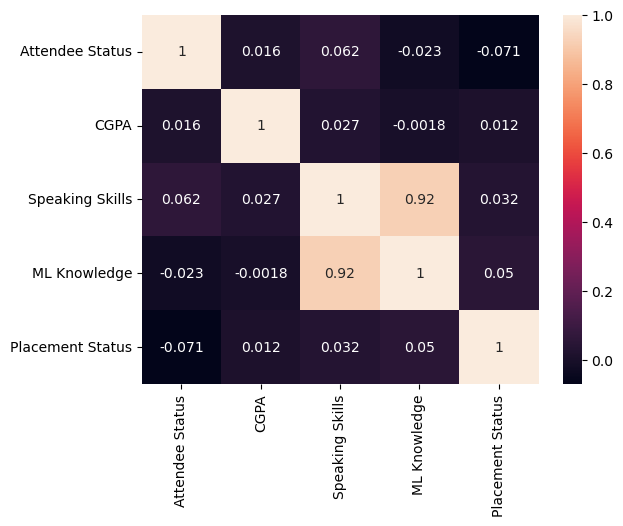

In [20]:
sns.heatmap(X_trainset.corr(), annot=True)
plt.show()

### Preparing the datasets for training


In [21]:
y = X_trainset["Placement Status"]
X_trainset.drop(["Placement Status"], axis=1, inplace=True)
y

0      0
1      0
2      0
3      1
4      1
      ..
414    0
415    1
416    1
417    0
418    0
Name: Placement Status, Length: 419, dtype: int64

In [22]:
X_trainset

,Attendee Status,CGPA,Speaking Skills,ML Knowledge
0,1,9.6,3,2
1,1,9.9,3,2
2,1,7.6,2,5
3,1,8.9,3,4
4,1,7.7,5,4
...,...,...,...,...
414,1,9.1,3,3
415,1,6.7,4,4
416,1,7.9,4,4
417,1,7.3,2,2


In [23]:
# Creating the test and train datasets for ML Models
X_train, X_test, y_train, y_test = train_test_split(
    X_trainset, y, test_size=0.15, random_state=1
)

## Create, Train & Test ML Models

---


### Logistic Regression


In [24]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        41
           1       0.00      0.00      0.00        22

    accuracy                           0.65        63
   macro avg       0.33      0.50      0.39        63
weighted avg       0.42      0.65      0.51        63



/home/soumyajitkolay/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/soumyajitkolay/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/soumyajitkolay/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
uniqounter(y_pred)

{0: 63}

We observe that LR does not output "Placed" results at all.


### Decision Tree Classifier


In [26]:
dtree = DecisionTreeClassifier(criterion="gini", random_state=1)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.85      0.74        41
           1       0.40      0.18      0.25        22

    accuracy                           0.62        63
   macro avg       0.53      0.52      0.50        63
weighted avg       0.57      0.62      0.57        63



In [27]:
uniqounter(y_pred)

{0: 53, 1: 10}

### Random Forest Classifier


In [28]:
random_forest = RandomForestClassifier(n_estimators=10000)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75        41
           1       0.45      0.23      0.30        22

    accuracy                           0.63        63
   macro avg       0.56      0.54      0.53        63
weighted avg       0.60      0.63      0.60        63



In [29]:
uniqounter(y_pred)

{0: 52, 1: 11}

### Linear SVM


In [30]:
svm_model = SVC(kernel="linear", C=1.0)
svm_model.fit(X_train, y_train)
svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75        41
           1       0.45      0.23      0.30        22

    accuracy                           0.63        63
   macro avg       0.56      0.54      0.53        63
weighted avg       0.60      0.63      0.60        63



In [31]:
uniqounter(y_pred)

{0: 52, 1: 11}

### Naive Bayes Classifier


In [32]:
nbayes_model = GaussianNB()
nbayes_model.fit(X_train, y_train)
nbayes_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75        41
           1       0.45      0.23      0.30        22

    accuracy                           0.63        63
   macro avg       0.56      0.54      0.53        63
weighted avg       0.60      0.63      0.60        63



In [33]:
uniqounter(y_pred)

{0: 52, 1: 11}

### XGBoost Classifier


In [34]:
model_xgbc = XGBClassifier(eval_metric="mlogloss", n_jobs=16, max_depth=3)
model_xgbc.fit(X_train, y_train)
y_pred = model_xgbc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.78      0.70        41
           1       0.25      0.14      0.18        22

    accuracy                           0.56        63
   macro avg       0.44      0.46      0.44        63
weighted avg       0.50      0.56      0.51        63



In [35]:
uniqounter(y_pred)

{0: 51, 1: 12}

In [36]:
xgb_classifier = xgb.XGBClassifier(
    n_estimators=10000,
    objective="multi:softmax",
    tree_method="hist",
    eta=0.45,
    max_depth=7,
    num_class=2,
    eval_metric="mlogloss",
)
xgb_classifier.fit(X_train, y_train)

# Convert the model to a native API model
xgbc_model = xgb_classifier.get_booster()
y_pred = xgbc_model.predict(xgb.DMatrix(X_test))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.80      0.72        41
           1       0.33      0.18      0.24        22

    accuracy                           0.59        63
   macro avg       0.49      0.49      0.48        63
weighted avg       0.54      0.59      0.55        63



In [37]:
uniqounter(y_pred)

{0.0: 51, 1.0: 12}

In [38]:
class SaveBestModel(xgb.callback.TrainingCallback):
    def __init__(self, cvboosters):
        self._cvboosters = cvboosters

    def after_training(self, model):
        self._cvboosters[:] = [cvpack.bst for cvpack in model.cvfolds]
        return model


params = {"objective": "multi:softmax", "num_class": 2, "eta": 0.45, "max_depth": 7}
cvboosters = []

cv_results = xgb.cv(
    dtrain=xgb.DMatrix(X_train, y_train, enable_categorical=True),
    params=params,
    nfold=16,
    num_boost_round=1000,
    as_pandas=True,
    metrics=["mlogloss", "merror"],
    callbacks=[
        SaveBestModel(cvboosters),
    ],
)
y_pred = cvboosters[0].predict(xgb.DMatrix(X_test))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.78      0.70        41
           1       0.31      0.18      0.23        22

    accuracy                           0.57        63
   macro avg       0.47      0.48      0.47        63
weighted avg       0.52      0.57      0.54        63



In [39]:
uniqounter(y_pred)

{0.0: 50, 1.0: 13}

## Finalizing and exporting

---


We found that **Random Forest Classifier** and **Linear SVM** have the highest accuracy score among all the classification algorithms.

Here, we select **RF Classifier** to predict the results.

Hence, we shall be training the RF model with the full (cleaned and preprocessed) dataset and then use it to predict the **Placement Status** for the **test dataset**.


### Re-Training the Model

(With Full Dataset)


In [40]:
random_forest.fit(X_trainset, y)

RandomForestClassifier(n_estimators=10000)

### Preprocess the Test Data


In [41]:
data_test.head(1)

,First Name,Email ID,Quantity,Price Tier,Ticket Type,Attendee #,Group,Order Type,Currency,Total Paid,...,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,Sahil,sahil@xyz.com,1,NaN,Hello ML and DL,2.293940e+09,NaN,Free Order,USD,0,...,Attending,"symbiosis institute of technology, pune",Whatsapp,NaN,Students,NaN,7.8,3,3,NaN


In [42]:
data_test.shape

(3796, 23)

In [43]:
data_test.columns

Index(['First Name', 'Email ID', 'Quantity', 'Price Tier', 'Ticket Type',
       'Attendee #', 'Group', 'Order Type', 'Currency', 'Total Paid',
       'Fees Paid', 'Eventbrite Fees', 'Eventbrite Payment Processing',
       'Attendee Status', 'College Name',
       'How did you come to know about this event?',
       'Specify in "Others" (how did you come to know about this event)',
       'Designation', 'Year of Graduation', 'CGPA', 'Speaking Skills',
       'ML Knowledge', 'Placement Status'],
      dtype='object')

In [44]:
X_test = data_test.drop(
    [
        "First Name",  # ID/unrequired for ML Model
        "Email ID",  # ID/unrequired for ML Model
        "Quantity",  # Same for all/irrelevant for ML Model
        "Price Tier",  # Same for all/irrelevant for ML Model
        "Ticket Type",  # Same for all/irrelevant for ML Model
        "Attendee #",  # ID/unrequired for ML Model
        "Group",  # Same for all/irrelevant for ML Model
        "Order Type",  # Same for all/irrelevant for ML Model
        "Currency",  # Same for all/irrelevant for ML Model
        "Total Paid",  # Same for all/irrelevant for ML Model
        "Fees Paid",  # Same for all/irrelevant for ML Model
        "Eventbrite Fees",  # Same for all/irrelevant for ML Model
        "Eventbrite Payment Processing",  # Same for all/irrelevant for ML Model
        "College Name",  # Contains noise
        "Year of Graduation",  # Contains noise/irrelevant values
        "How did you come to know about this event?",  # Irrelevant for Given Problem Statement
        'Specify in "Others" (how did you come to know about this event)',  # Same for all/irrelevant for ML Model
        "Designation",  # Same for all/irrelevant for ML Model
        "Placement Status",  # To be predicted
    ],
    axis=1,
)
X_test["Attendee Status"].replace({"Attending": 1, "NAN": 0}, inplace=True)
X_test

,Attendee Status,CGPA,Speaking Skills,ML Knowledge
0,1,7.8,3,3
1,1,9.1,3,3
2,1,6.9,2,2
3,1,8.4,4,4
4,1,6.7,5,5
...,...,...,...,...
3791,1,9.0,3,2
3792,1,7.2,4,3
3793,1,8.5,2,3
3794,1,6.5,5,5


In [45]:
y_final = random_forest.predict(X_test)
y_final

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
uniqounter(y_final)

{0: 3157, 1: 639}

In [47]:
data_test["Placement Status"] = pd.Series(y_final).replace(
    {0: "Not placed", 1: "Placed"}
)

In [48]:
data_test

,First Name,Email ID,Quantity,Price Tier,Ticket Type,Attendee #,Group,Order Type,Currency,Total Paid,...,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,Sahil,sahil@xyz.com,1,NaN,Hello ML and DL,2.293940e+09,NaN,Free Order,USD,0,...,Attending,"symbiosis institute of technology, pune",Whatsapp,NaN,Students,NaN,7.8,3,3,Not placed
1,Amrita,amrita@xyz.com,1,NaN,Hello ML and DL,2.293941e+09,NaN,Free Order,USD,0,...,Attending,"mit academy of engineering ,alandi",Whatsapp,NaN,Students,NaN,9.1,3,3,Not placed
2,Mamta,mamta@xyz.com,1,NaN,Hello ML and DL,2.293941e+09,NaN,Free Order,USD,0,...,Attending,a. c. patil college of engineering,Whatsapp,NaN,Students,NaN,6.9,2,2,Not placed
3,Bhagyashri,bhagyashri@xyz.com,1,NaN,Hello ML and DL,2.293946e+09,NaN,Free Order,USD,0,...,Attending,wilson college,Others,NaN,Students,NaN,8.4,4,4,Not placed
4,Divyanshu,divyanshu@xyz.com,1,NaN,Hello ML and DL,2.293956e+09,NaN,Free Order,USD,0,...,Attending,"ld college of engineering, ahmedabad, gujarat",Whatsapp,NaN,Students,NaN,6.7,5,5,Not placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791,Saif ali,saifali@xyz.com,1,NaN,Data Visualization using Power BI,1.949319e+09,NaN,Free Order,USD,0,...,Attending,"mit academy of engineering ,alandi",NaN,NaN,Students,2021,9.0,3,2,Not placed
3792,Lankesh,lankesh@xyz.com,1,NaN,Data Visualization using Power BI,1.949328e+09,NaN,Free Order,USD,0,...,Attending,a. c. patil college of engineering,NaN,NaN,Students,2021,7.2,4,3,Not placed
3793,Sanjay,sanjay@xyz.com,1,NaN,Data Visualization using Power BI,1.949328e+09,NaN,Free Order,USD,0,...,Attending,wilson college,NaN,NaN,Students,2021,8.5,2,3,Not placed
3794,Sushmita,sushmita@xyz.com,1,NaN,Data Visualization using Power BI,1.949330e+09,NaN,Free Order,USD,0,...,Attending,"ld college of engineering, ahmedabad, gujarat",NaN,NaN,Students,2021,6.5,5,5,Not placed


In [49]:
data_test.to_excel("03 Predicted Data.xlsx")

---

Author: Soumyajit Kolay

Organization: Cloud Counselage
